In [2]:
using Statistics
using StatsBase
using RDatasets
using Plots
using StatsPlots
using KernelDensity
using Distributions
using LinearAlgebra
using HypothesisTests
using PyCall
using MLBase

In [3]:
D = dataset("datasets", "faithful")
@show names(D)
D

names(D) = ["Eruptions", "Waiting"]


,Eruptions,Waiting
,Float64,Int64
1,3.6,79
2,1.8,54
3,3.333,74
4,2.283,62
5,4.533,85
6,2.883,55
7,4.7,88
8,3.6,85
9,1.95,51


In [4]:
describe(D)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,Eruptions,3.48778,1.6,4.0,5.1,0,Float64
2,Waiting,70.8971,43,76.0,96,0,Int64


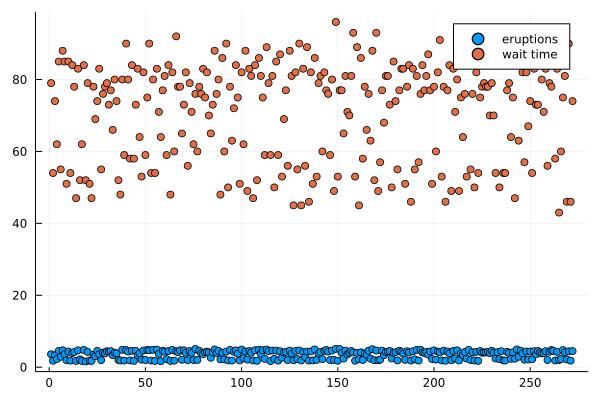

In [5]:
eruptions = D[!,:Eruptions]
scatter(eruptions, label="eruptions")
waittime = D[!,:Waiting]
scatter!(waittime, label="wait time")

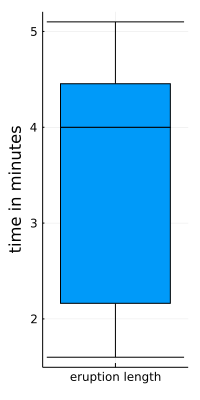

In [6]:
boxplot(["eruption length"], eruptions, legend=false,size=(200,400),whisker_width=1,ylabel="time in minutes")

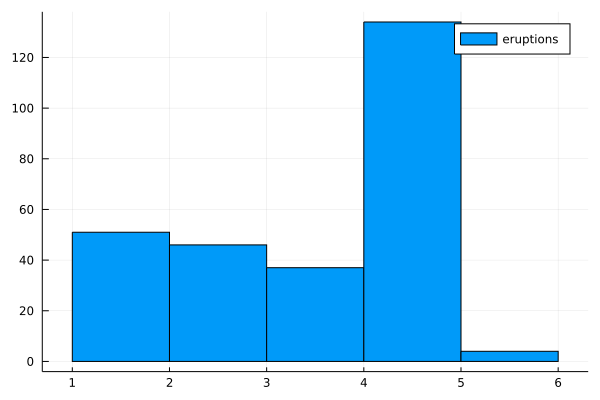

In [7]:
histogram(eruptions, label="eruptions")

In [8]:
?histogram

search: histogram histogram! Histogram histogram2d histogram2d! ea_histogram



```
histogram(x)
histogram!(x)
```

Plot a histogram.

# Arguments

  * `x`: AbstractVector of values to be binned
  * `bins`: Integer, NTuple{2,Integer}, AbstractVector or          Symbol. Default is :auto (the Freedman-Diaconis rule). For          histogram-types, defines the approximate number of bins to aim for,          or the auto-binning algorithm to use (:sturges,          :sqrt, :rice, :scott or :fd). For fine-grained control          pass a Vector of break values, e.g. `range(minimum(x),          stop = maximum(x), length = 25)`
  * `weights`: Vector of weights for the values in `x`, for weighted bin counts
  * `normalize`: Bool or Symbol. Histogram normalization mode.               Possible values are: false/:none (no normalization,               default), true/:pdf (normalize to a discrete               Probability Density Function, where the total area of the               bins is 1), :probability (bin heights sum to 1)               and :density (the area of each bin, rather than               the height, is equal to the counts - useful for               uneven bin sizes).
  * `bar_position`: Symbol.  Choose from `:overlay` (default),                  `:stack`.  (warning: May not be implemented fully)
  * `bar_width`: nothing or Number. Width of bars in data               coordinates. When nothing, chooses based on x (or y when               `orientation = :h`).
  * `bar_edges`: Bool.  Align bars to edges (true), or centers               (the default)?
  * `orientation`: Symbol.  Horizontal or vertical orientation                 for bar types.  Values `:h`, `:hor`,                 `:horizontal` correspond to horizontal (sideways,                 anchored to y-axis), and `:v`, `:vert`, and                 `:vertical` correspond to vertical (the default).

# Example

```julia-repl
julia> histogram([1,2,1,1,4,3,8],bins=0:8)
julia> histogram([1,2,1,1,4,3,8],bins=0:8,weights=weights([4,7,3,9,12,2,6]))
```


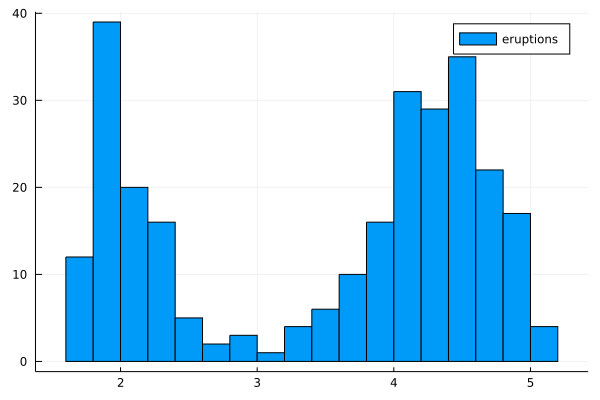

In [9]:
histogram(eruptions, bins=:sqrt,label="eruptions")

In [10]:
p = kde(eruptions)

UnivariateKDE{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}}}(0.2608918621442271:0.0030181808870110138:6.439108137855772, [1.1161139442217305e-5, 1.1244427155304715e-5, 1.1344179473224414e-5, 1.146054328619861e-5, 1.1593684794655723e-5, 1.1743789689266926e-5, 1.1911063348919726e-5, 1.2095731053138326e-5, 1.2298038211913664e-5, 1.2518250611666393e-5  …  1.1215022627797389e-5, 1.113759304488017e-5, 1.1076192604056456e-5, 1.1030781609218734e-5, 1.1001338720893414e-5, 1.0987860983070058e-5, 1.0990363864678623e-5, 1.1008881316295835e-5, 1.1043465842321826e-5, 1.1094188587988663e-5])

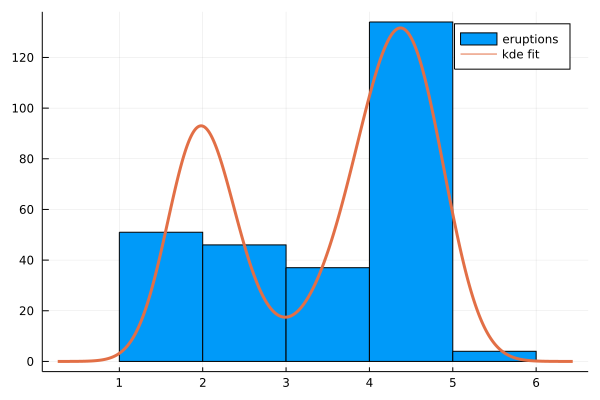

In [11]:
histogram(eruptions, label="eruptions")
plot!(p.x, p.density .* length(eruptions), linewidth=3, color=2, label="kde fit")
# nb of elements * bin width

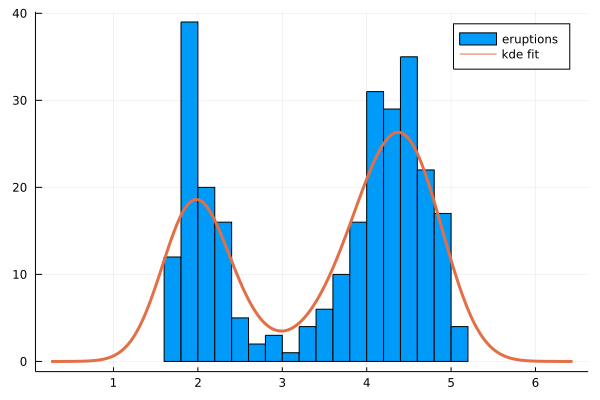

In [13]:
histogram(eruptions, bins=:sqrt, label="eruptions")
plot!(p.x, p.density .* length(eruptions) .* 0.2, linewidth=3, color=2, label="kde fit")

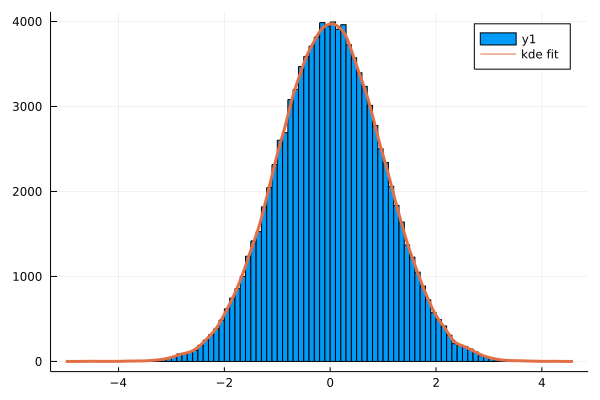

In [17]:
myrandomvector = randn(100_000) # this notation works for numbers too
histogram(myrandomvector)
p=kde(myrandomvector)
plot!(p.x, p.density .* length(myrandomvector) .* 0.1, linewidth=3, color=2, label="kde fit")

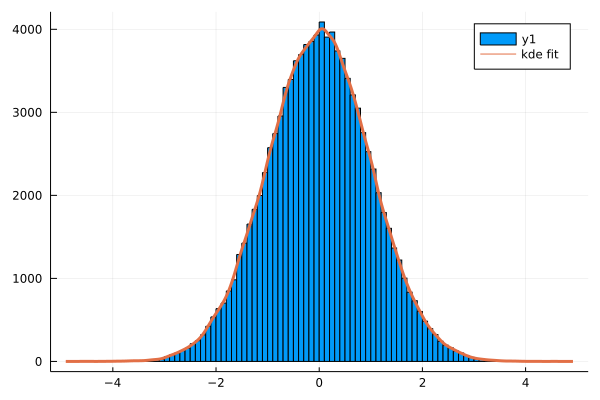

In [18]:
d = Normal()
myrandomvector = rand(d, 100000)
histogram(myrandomvector)
p = kde(myrandomvector)
plot!(p.x, p.density .* length(myrandomvector) .* 0.1, linewidth=3, color=2, label="kde fit")

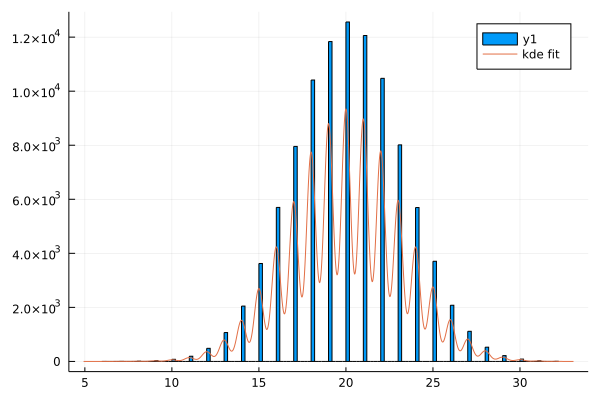

In [21]:
b = Binomial(40)
myrandomvector = rand(b, 100000)
histogram(myrandomvector)
p = kde(myrandomvector)
plot!(p.x, p.density .* length(myrandomvector) .* 0.5, color=2, label="kde fit")

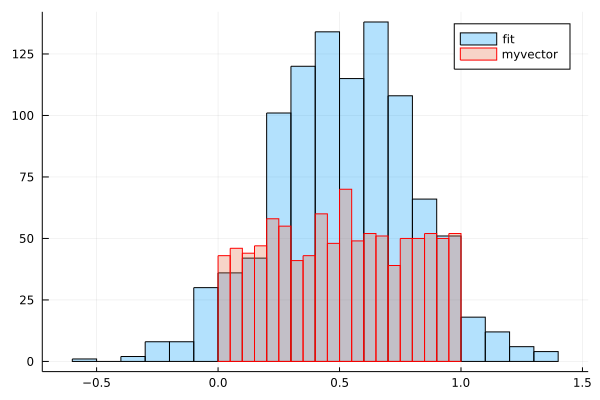

In [24]:
x = rand(1000)
d = fit(Normal, x)
myrandomvector = rand(d, 1000)
histogram(myrandomvector, nbins=20, fillalpha=0.3, label="fit")
histogram!(x, nbins=20, linecolor = :red, fillalpha =0.3, label="myvector")

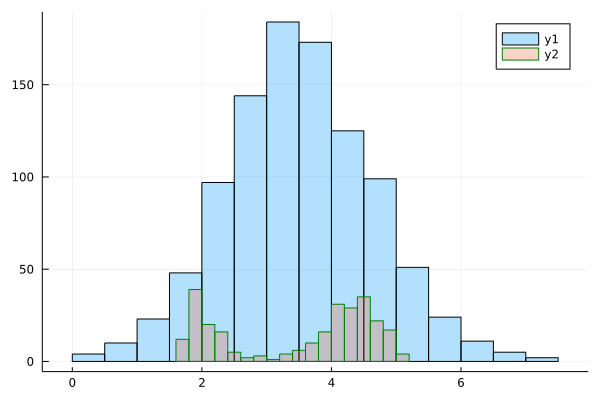

In [25]:
x = eruptions
d = fit(Normal, x)
myrandomvector = rand(d, 1000)
histogram(myrandomvector, nbins = 20, fillalpha = 0.3)
histogram!(x, nbins = 20, linecolor = :green, fillalpha = 0.3)

In [26]:
?OneSampleTTest

search: OneSampleTTest OneSampleHotellingT2Test OneSampleZTest OneSampleADTest



```
OneSampleTTest(xbar::Real, stddev::Real, n::Int, μ0::Real = 0)
```

Perform a one sample t-test of the null hypothesis that `n` values with mean `xbar` and sample standard deviation `stddev`  come from a distribution with mean `μ0` against the alternative hypothesis that the distribution does not have mean `μ0`.

Implements: [`pvalue`](@ref), [`confint`](@ref)

---

```
OneSampleTTest(v::AbstractVector{T<:Real}, μ0::Real = 0)
```

Perform a one sample t-test of the null hypothesis that the data in vector `v` comes from a distribution with mean `μ0` against the alternative hypothesis that the distribution does not have mean `μ0`.

Implements: [`pvalue`](@ref), [`confint`](@ref)

---

```
OneSampleTTest(x::AbstractVector{T<:Real}, y::AbstractVector{T<:Real}, μ0::Real = 0)
```

Perform a paired sample t-test of the null hypothesis that the differences between pairs of values in vectors `x` and `y` come from a distribution with mean `μ0` against the alternative hypothesis that the distribution does not have mean `μ0`.

Implements: [`pvalue`](@ref), [`confint`](@ref)


In [27]:
myrandomvector = randn(1000)
histogram(myrandomvector)
OneSampleTTest(myrandomvector)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          0.0222856
    95% confidence interval: (-0.0403, 0.0849)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.4848

Details:
    number of observations:   1000
    t-statistic:              0.6988353469936549
    degrees of freedom:       999
    empirical standard error: 0.03188961483701558


In [28]:
OneSampleTTest(eruptions)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          3.48778
    95% confidence interval: (3.3515, 3.624)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-99

Details:
    number of observations:   272
    t-statistic:              50.39726752574924
    degrees of freedom:       271
    empirical standard error: 0.06920579744632577


In [29]:
OneSampleTTest(waittime)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          70.8971
    95% confidence interval: (69.2742, 72.5199)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-99

Details:
    number of observations:   272
    t-statistic:              86.00709838516086
    degrees of freedom:       271
    empirical standard error: 0.8243163663775169


In [38]:
# this one didn't work becuase it couldn't find the scipy thing
scipy_stats = pyimport("scipy.stats")
@show scipy_stats.spearmanr(eruptions, waittime)
@show scipy_stats.pearsonr(eruptions, waittime)

LoadError: ArgumentError: Package Conda not found in current path:
- Run `import Pkg; Pkg.add("Conda")` to install the Conda package.


In [39]:
scipy_stats.pearson(eruptions, waittime)
# again didn't work

LoadError: UndefVarError: scipy_stats not defined

In [41]:
# can just use the julia version of it since python won't work
corspearman(eruptions, waittime)

0.7779720576516121

In [42]:
# can just use the julia version since python won't work
cor(eruptions, waittime)

0.900811168321813

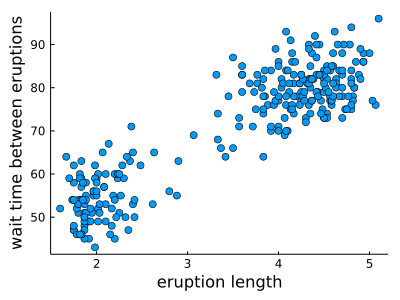

In [43]:
scatter(eruptions, waittime, xlabel="eruption length", ylabel="wait time between eruptions", legend = false, grid = false, size=(400,300))

In [49]:
gt = [1,1,1,1,1,1,1,2]
pred = [1,1,2,2,1,1,1,1]
C = confusmat(2, gt, pred) # compute confusion matrix
C ./ sum(C, dims=2) # normalize per class
sum(diag(C)) / length(gt) # compute correct rate from confusion matrix
@show correctrate(gt, pred)
@show C = confusmat(2, gt, pred)

correctrate(gt, pred) = 0.625
C = confusmat(2, gt, pred) = [5 2; 1 0]


2×2 Matrix{Int64}:
 5  2
 1  0

In [48]:
gt = [1, 1, 1, 1, 1, 1, 1, 0]
pred = [1, 1, 0, 0, 1, 1, 1, 1]
ROC = MLBase.roc(gt, pred)
@show recall(ROC)
@show precision(ROC)

recall(ROC) = 0.7142857142857143
precision(ROC) = 0.8333333333333334


0.8333333333333334